# Predicting Bike Rental Usage #
In this project my objective is to predict bike rental usage based on inputs such as temperature, humidity, wind speed etc. 

---
For solution to this problem I will create a regression model. Since there are more than 1 feature I will need to create a neural network architecture with more than single neuron which will be Multi-Layer Perceptron




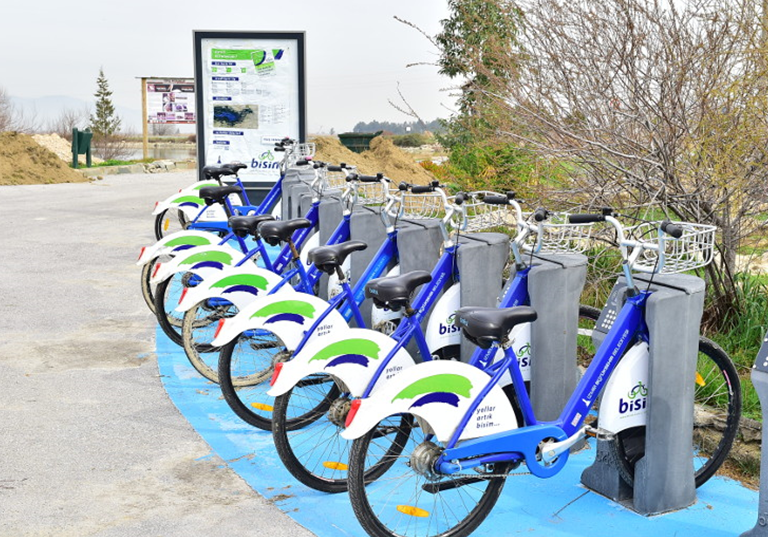


---
- Data Reference: 
    - This Hadi Fanaee-T
    - Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto INESC Porto, Campus da FEUP Rua Dr. Roberto Frias, 378 4200 - 465 Porto, Portugal

- Data Description: 
    - instant: record index
    - dteday : date
    - season : season (1:springer, 2:summer, 3:fall, 4:winter)
    - yr : year (0: 2011, 1:2012)
    - mnth : month ( 1 to 12)
    - hr : hour (0 to 23)
    - holiday : wether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    - weekday : day of the week
    - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
    + weathersit : 
        - 1: Clear, Few clouds, Partly cloudy
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
    - hum: Normalized humidity. The values are divided to 100 (max)
    - windspeed: Normalized wind speed. The values are divided to 67 (max)
    - casual: count of casual users
    - registered: count of registered users
    - cnt: count of total rental bikes including both casual and registered


---




In [1]:
# Let's start by importing necesseray libraries 

!pip install tensorflow-gpu==2.0.0.alpha0
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0.alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0.alpha0


# Chapter 1 
We need to import dataset which I have on my drive. I will mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
bike = pd.read_csv('/content/drive/My Drive/bike_sharing_daily.csv')

In [7]:
# Let' check dataset 
bike.head(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.518261,0.089565,88,1518,1606
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.498696,0.168726,148,1362,1510
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.535833,0.266804,68,891,959
8,9,1/9/2011,1,0,1,0,0,0,1,0.138333,0.434167,0.361950,54,768,822
9,10,1/10/2011,1,0,1,0,1,1,1,0.150833,0.482917,0.223267,41,1280,1321


In [8]:
bike.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
721,722,12/22/2012,1,1,12,0,6,0,1,0.265833,0.441250,0.407346,205,1544,1749
722,723,12/23/2012,1,1,12,0,0,0,1,0.245833,0.515417,0.133083,408,1379,1787
723,724,12/24/2012,1,1,12,0,1,1,2,0.231304,0.791304,0.077230,174,746,920
724,725,12/25/2012,1,1,12,1,2,0,2,0.291304,0.734783,0.168726,440,573,1013
725,726,12/26/2012,1,1,12,0,3,1,3,0.243333,0.823333,0.316546,9,432,441
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [9]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [10]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# Chapter 2 
I will clean dataset 

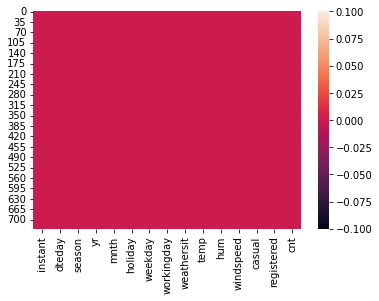

In [11]:
sns.heatmap(bike.isnull())
# I have used heat map to see if there is any null values. 
# (Even though I checked previously I wanted to add for fancier look :) ) .

In [16]:
bike["season"].unique().shape
bike["season"].value_counts()
# we have 4 season I was curious and wanted to check if they are correct 

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [18]:
# Also instant column is basically index. We already have index in our dataframe so I can drop
bike = bike.drop(labels = ['instant'], axis = 1) 
# After dropping I tried run again and instant column is not found 

KeyError: ignored

In [19]:
# since we know that casual + registered = cnt and I am trying to predict total count 
# I can drop these 2 columns as well 
bike = bike.drop(labels = ['casual', 'registered'], axis = 1)
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [20]:
# Also I will change date time format from 1/2/2011 to 2011-01-22	for visualization
bike.dteday = pd.to_datetime(bike.dteday, format = '%m/%d/%Y')
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [21]:
# Also Thanks to pandas I will use date as my index as well
bike.index = pd.DatetimeIndex(bike.dteday)
bike.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [22]:
# now I don't need another date I can drop it as well 
bike = bike.drop(labels = ['dteday'], axis = 1)
bike.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


# Chapter 3
Visualization of dataset

Text(0, 0.5, 'Bike Rental')

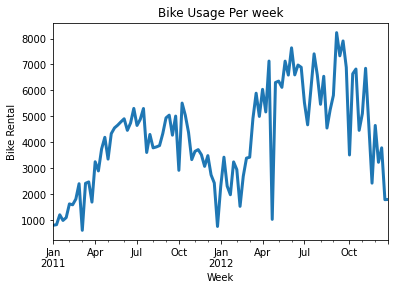

In [23]:
bike['cnt'].asfreq('W').plot(linewidth = 3) # weekly 
plt.title('Bike Usage Per week')
plt.xlabel('Week')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

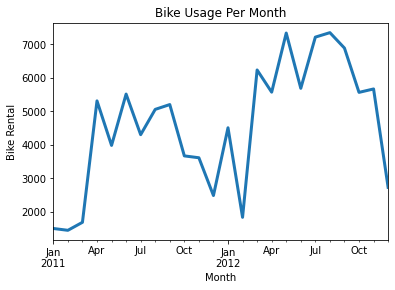

In [24]:
bike['cnt'].asfreq('M').plot(linewidth = 3) # monthly 
plt.title('Bike Usage Per Month')
plt.xlabel('Month')
plt.ylabel('Bike Rental')

Text(0, 0.5, 'Bike Rental')

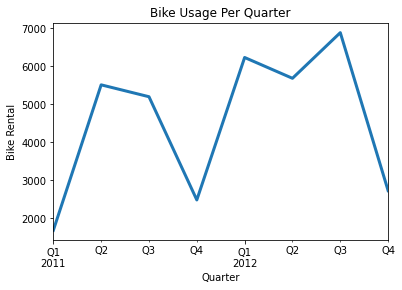

In [25]:
bike['cnt'].asfreq('Q').plot(linewidth = 3) # quarterly 
plt.title('Bike Usage Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Bike Rental')

if we want to plot entire dataset

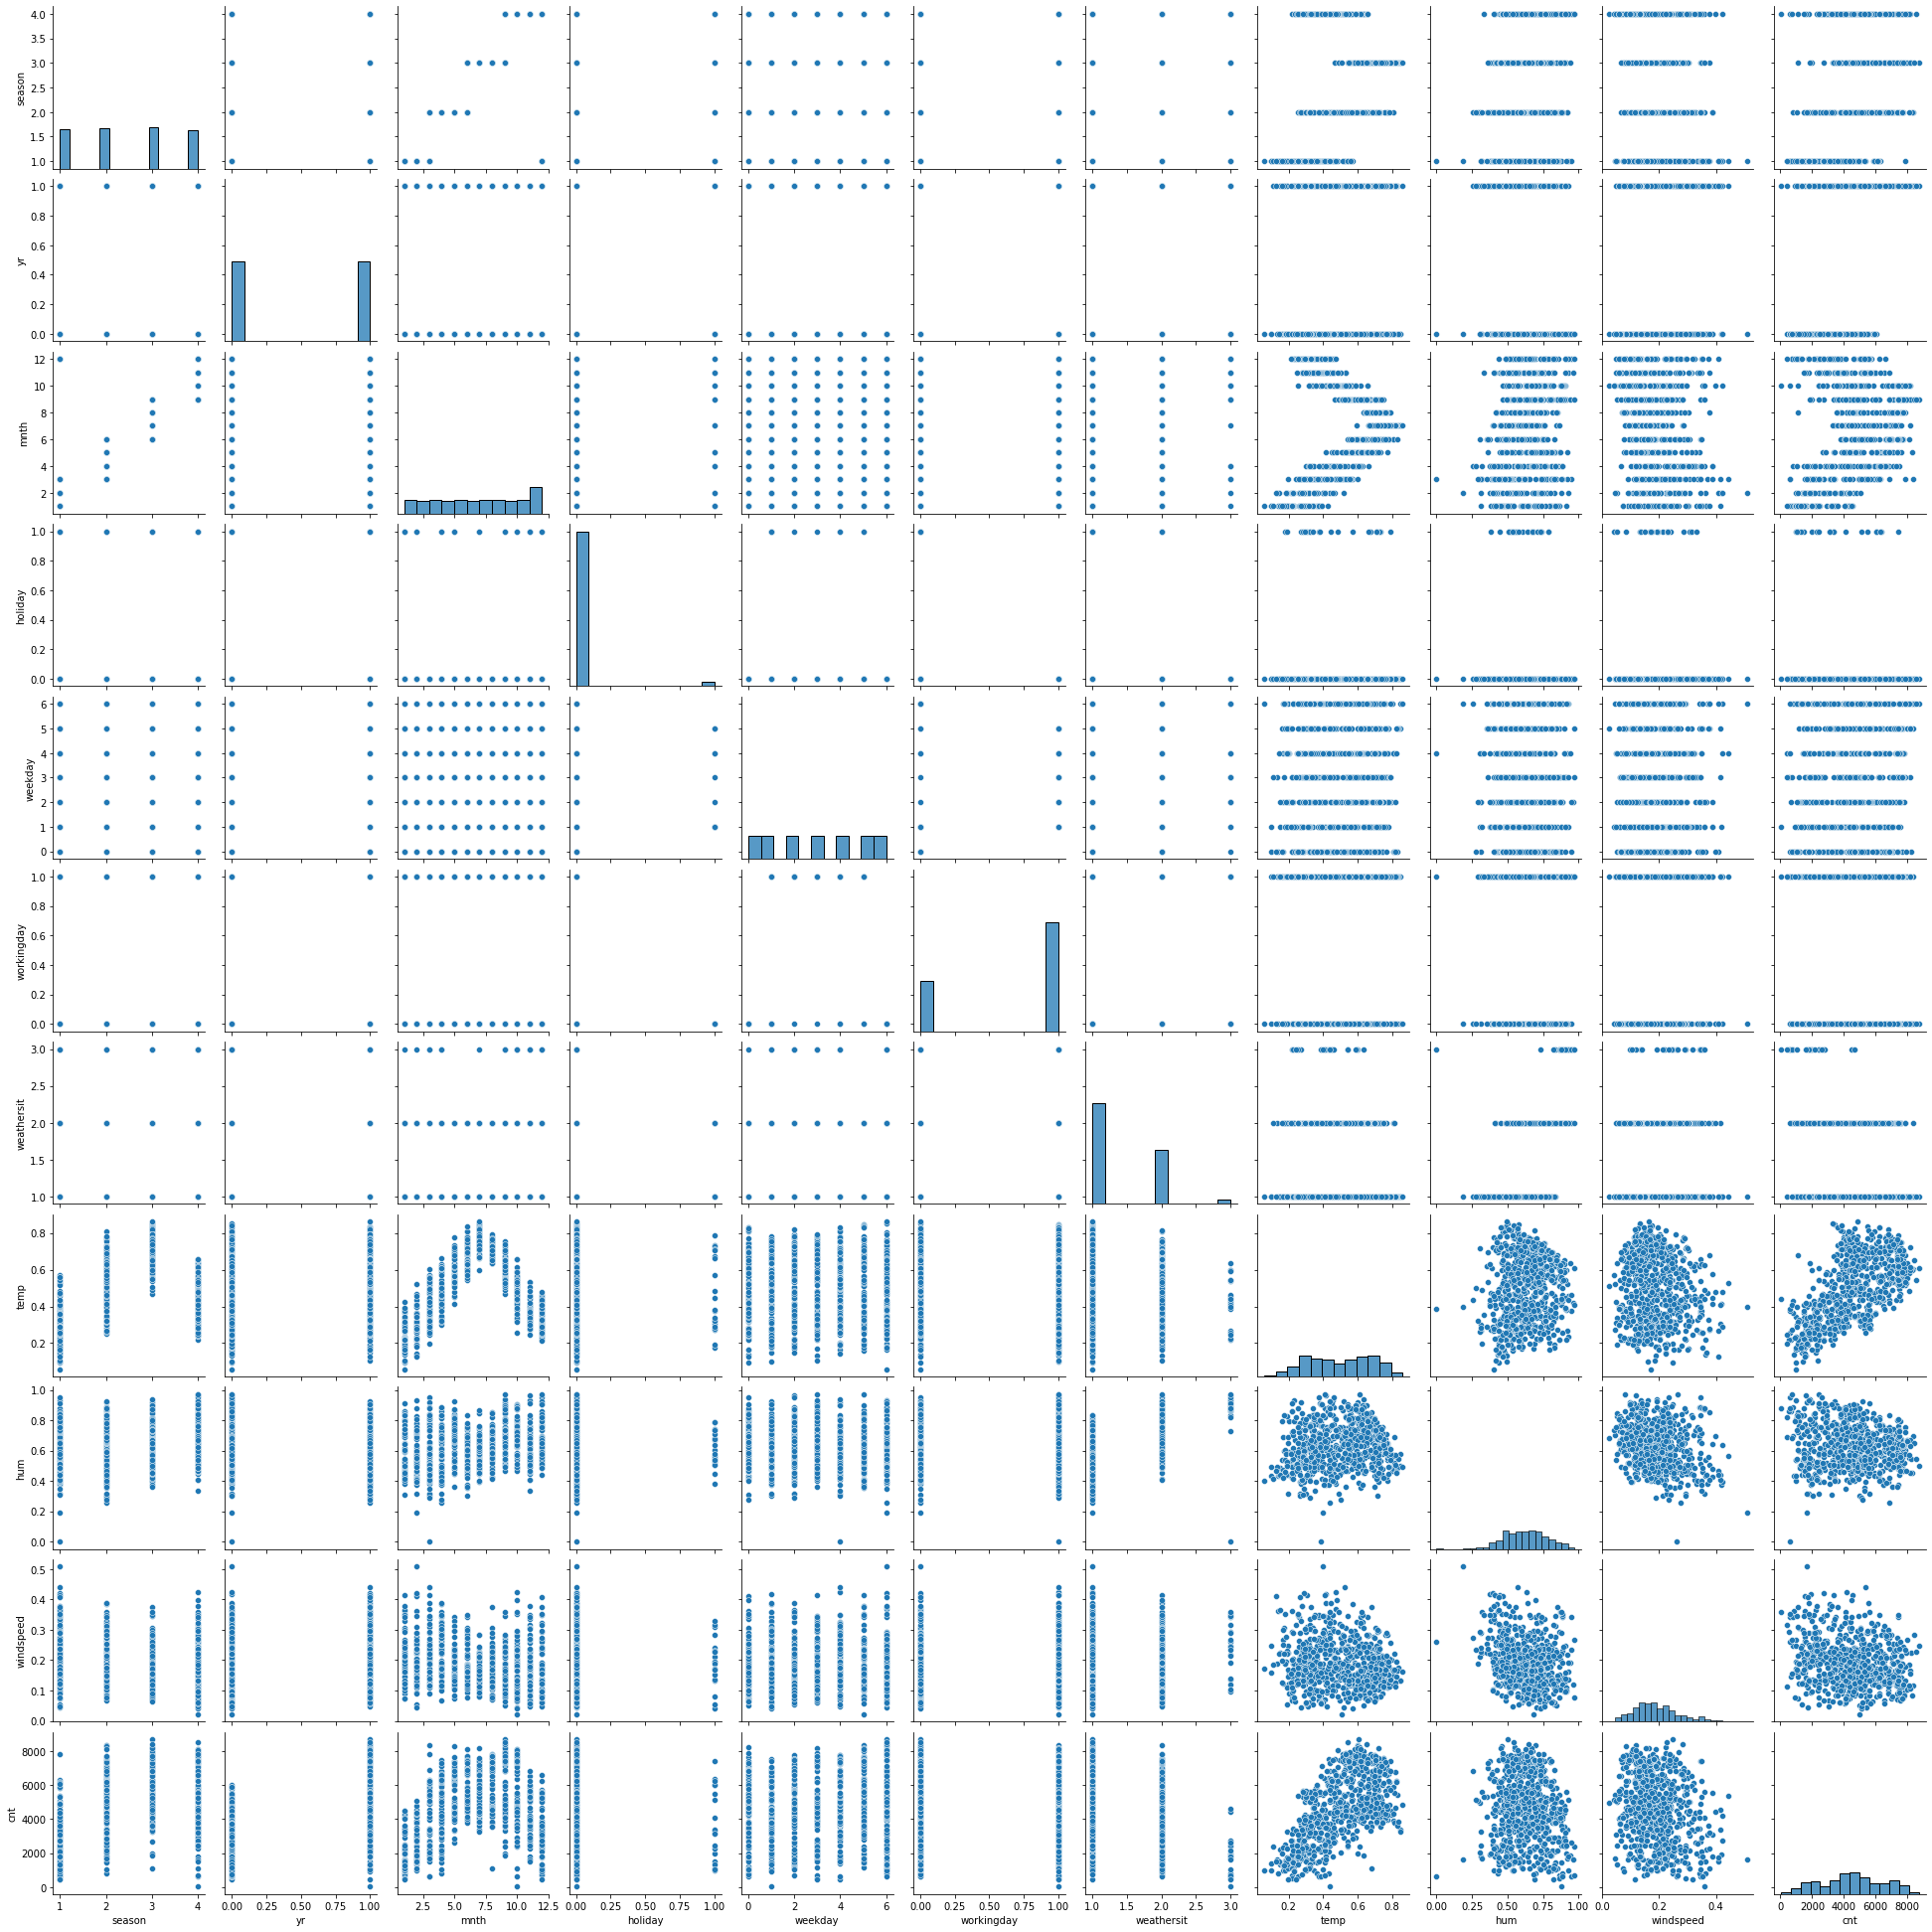

In [26]:
sns.pairplot(bike)

In [27]:
# If we want to see only numerical ones rather than categorical to make easier to understand
X_numerical = bike[['temp', 'hum', 'windspeed', 'cnt']]
X_numerical.head(5)

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


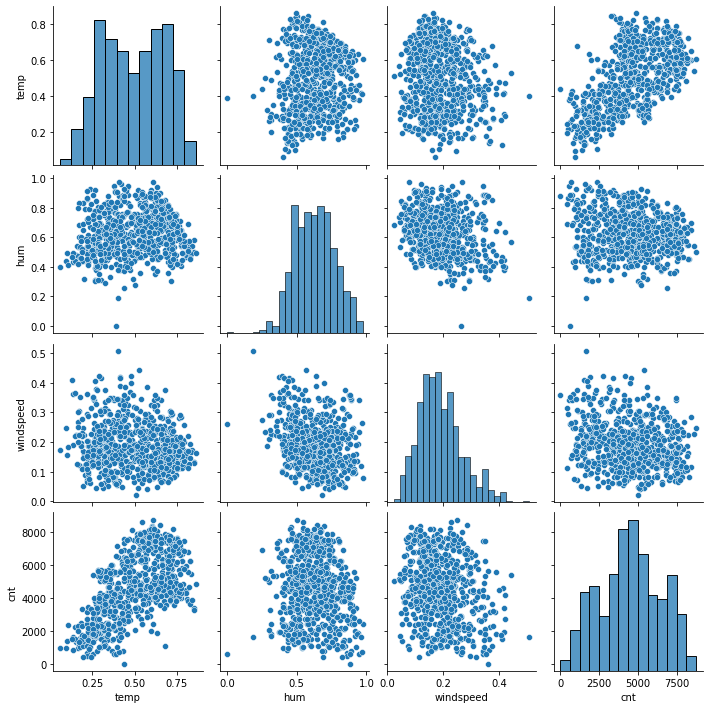

In [28]:
sns.pairplot(X_numerical)

Now we can check if features are correlated or not by using heatmap again

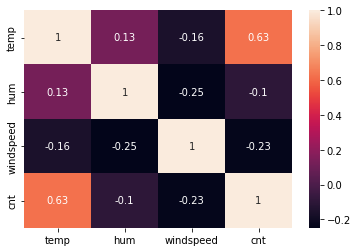

In [29]:
sns.heatmap(X_numerical.corr(), annot =True)# corr() function looks for correlation


Observations 
1.   windspeed and humidity have very small correlation 
2.   temperature and humidty have almost no correlation 
3.   Of course each has perfect correlation with itself 
4.  Finally there is strong correlation between count and temperature which makes sense when the weather is nice it is expected to people use bikes 




# Chapter 4
Creating training and test set 

In [30]:
# firstly I will take a look at categorical data only 
X_cat = bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
X_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


I will use one hot encoding to represent all information in a much simpler way for my network. Basically I will talk with binary language to model thanks to sklearn easily.
When we look for weekday it has values as 6 but it doesn't mean any significance for model so it shouldn't cause any confusion for mathematical part.

In [31]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
print(X_cat.shape)
print(X_cat[0])


(731, 32)
[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0.]


In [32]:
# Now I can store it as a dataframe again 
X_cat = pd.DataFrame(X_cat)

I also have numerical data for my dataset and now I can unite them so I can feed network together without losing any information. I will concatenate them

In [33]:
# Since I used date index for visuals now I can go back to using normal index before I unite
X_numerical = X_numerical.reset_index()

In [34]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all = X_all.drop('dteday', axis = 1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600


Now I can seperate which are the labels and which are the inputs. with X and y. Y is expected output

In [36]:
X = X_all.iloc[:, :-1].values
y = X_all.iloc[:, -1:].values

print(X.shape)
print(y.shape)

(731, 35)
(731, 1)


Now I will normalize cnt column to shrink between zero and one in order to have a better performance.  

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y)


Finally I am splitting my test and dataset as 80% for training and 20% for test 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20 percent is represented with 0.20

# Chapter 5
Creating architecture and training model


---
*   As can be expected I specifiy input shape based on my 35 features.
*   Also I am using Rectified Linear Unit in hidden layers. because it is a non-linear function, which means that it can introduce non-linearity into the network and make it capable of learning complex patterns in the data and ReLU has a non-saturating gradient, which means that the gradient of the function is always greater than or equal to 0. which 
*   At the output I am using a linear output because I am trying to predict a continous value. 
*   I am using 3 hidden layers with 100 neurons.
*   Loss is calculated with mean_squared_error and ptimizer is adam
*   20 epochs with batch_size = 50 and validation set is used for 20 percent 

(Hyperparameters are determined by trial and error)

In [39]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3600      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [41]:
epochs_hist = model.fit(X_train, y_train, epochs = 20, batch_size = 50, validation_split = 0.2)

Epoch 1/20
10/10 [==============================] - 2s 20ms/step - loss: 0.1604 - val_loss: 0.0970
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0504 - val_loss: 0.0344
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.0210
Epoch 4/20
10/10 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0159
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0118 - val_loss: 0.0136
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0101 - val_loss: 0.0120
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0113
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.0105
Epoch 9/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0067 - val_loss: 0.0105
Epoch 10/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0062 - val_loss: 0.0098
Epoch 11/20
10/10 

# Chapter 6
Evaluating model

In [42]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

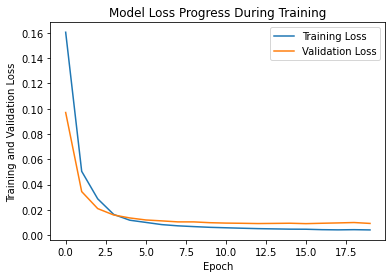

In [43]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

For more epoch overfitting occurse so I don't do further training. 
Now I can make predictions. 

5/5 [==============================] - 0s 5ms/step


Text(0, 0.5, 'True Values')

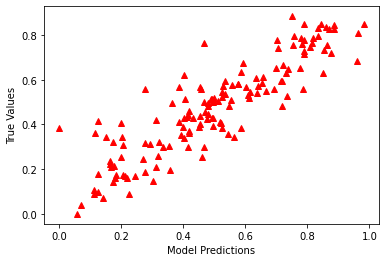

In [44]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


On the Y axis I present y_test which means my true values. On the X axis I present my model predictions. For a %100 true model I would have a straight line but since I am trying te "guess" we can see that it maches and results are close. 

To get a better understanding let's go back to original values before I normalized. 

In [45]:
y_predict_orig = scaler.inverse_transform(y_predict) # going back with inverse transform 
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

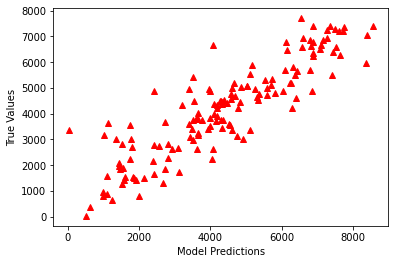

In [46]:
# Plotting again 
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

To evaluate perormance better we can focus on different performance metrics. 

In [47]:
k = X_test.shape[1] 
n = len(X_test) # I will need it 
n

147

In [48]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 950.428 
MSE = 903313.0366203358 
MAE = 706.2132523205815 
R2 = 0.7800370907901657 
Adjusted R2 = 0.7106794167149928


For different purposes error types could be acceptable or not. However model need improvements. Data-set might be increased or model could be tuned better in terms of hyperparameters.  